Dataset source [Fish](https://www.kaggle.com/aungpyaeap/fish-market)

In [1]:
import pandas as pd
data = pd.read_csv("Fish.csv")
data.head()
data = data[['Weight','Length1','Length2','Length3', 'Height', 'Width']]
data = pd.DataFrame(data)
data.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
import dcor
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Weight'], 
                                                                        data['Width'])))
print("p-value = {:.7f}".format(dcor.independence.distance_covariance_test(data['Weight'], 
                                                                           data['Width'], 
                                                                           exponent=1.0, 
                                                                           num_resamples=2000)[0]))

distance correlation = 0.94
p-value = 0.0004998


In [3]:
def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]
    if pval:
        return (dc, pv)
    else:
        return dc

In [4]:
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    #print("{:.4f}".format(d), "{:.4f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = pyplot.gca()
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


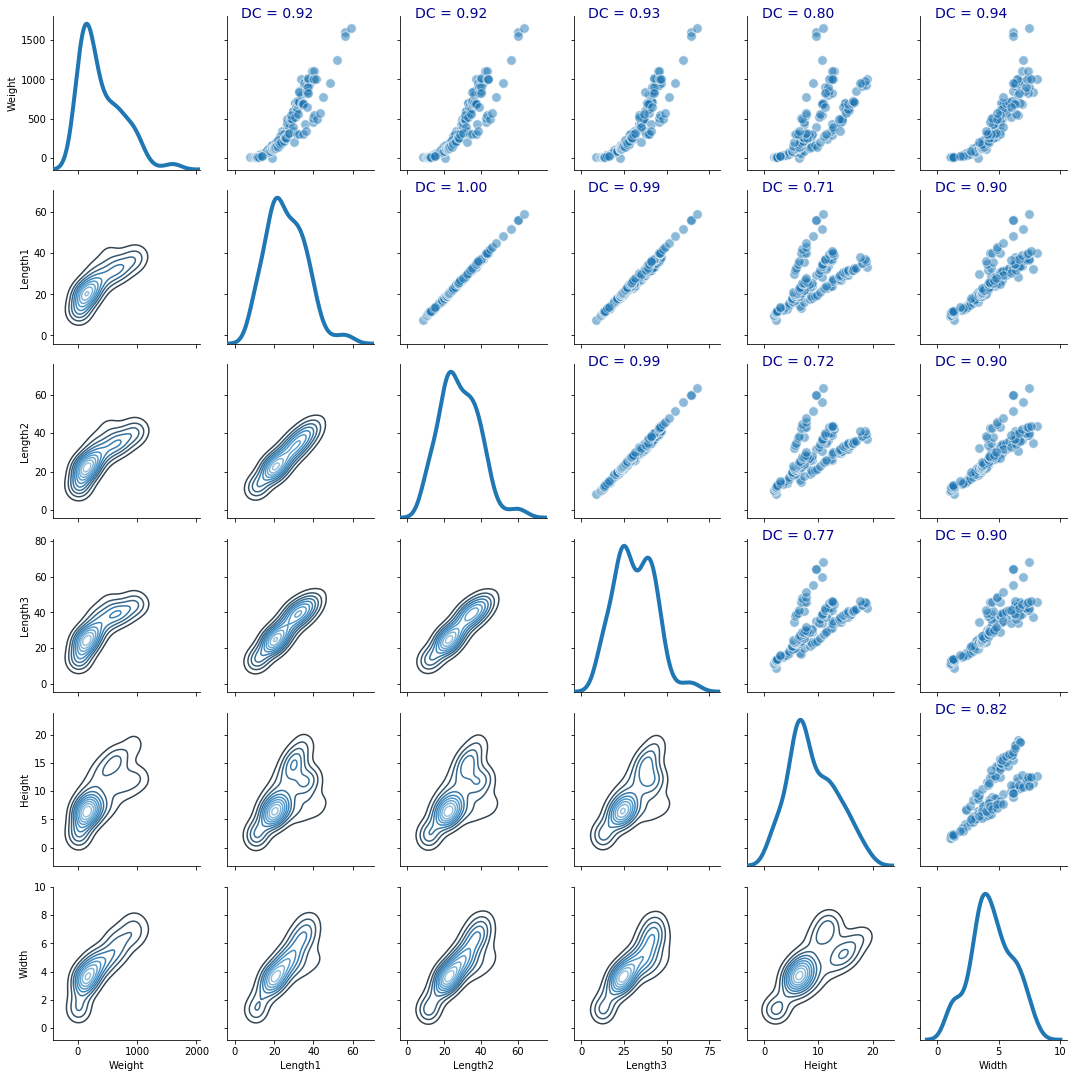

In [6]:
import seaborn as sns
from matplotlib import pyplot
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show();

In [7]:
# Create the distance method using distance_correlation
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 

# Apply the distance method pairwise to every column
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.00,0.92,0.92,0.93,0.80,0.94
Length1,0.92,1.00,1.00,0.99,0.71,0.90
Length2,0.92,1.00,1.00,0.99,0.72,0.90
Length3,0.93,0.99,0.99,1.00,0.77,0.90
Height,0.80,0.71,0.72,0.77,1.00,0.82
Width,0.94,0.90,0.90,0.90,0.82,1.00


In [8]:
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Weight'], data['Length1'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Weight'], data['Length2'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Weight'], data['Length3'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Weight'], data['Height'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Weight'], data['Width'])))
#print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], data['Random_2'])))

distance correlation = 0.92
distance correlation = 0.92
distance correlation = 0.93
distance correlation = 0.80
distance correlation = 0.94


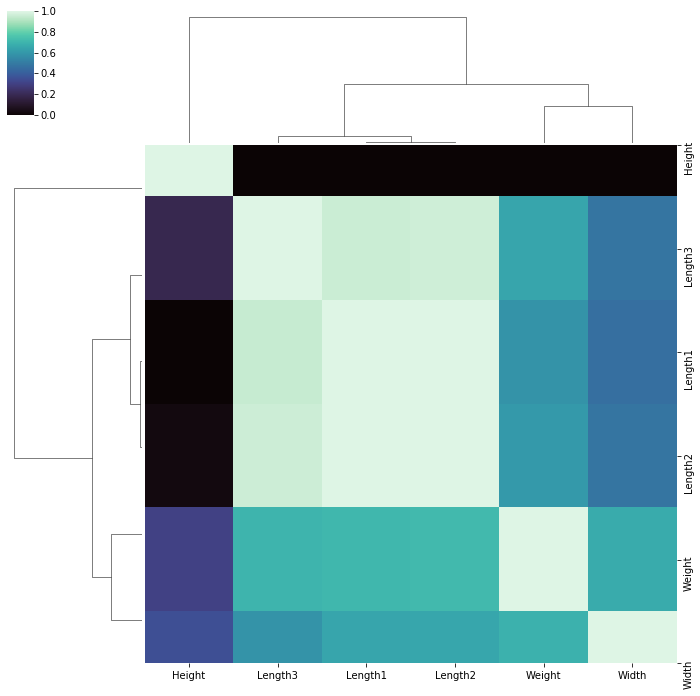

In [9]:
data.rename(index=str, columns={"Gross_pay_transform": "Gross_pay_tr"}, inplace=True)
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

# h = heatmap.Heatmap(rslt)
# h.plot(vmin=0.0, vmax=1.1, cmap='cubehelix')
# fig = plt.gcf()
# fig.set_size_inches(22, 18)
# plt.gcf().get_axes()[1].invert_xaxis();

# # heatmap
# ax = sns.heatmap(rslt, linewidth=0.5)
# fig = pyplot.gcf()
# fig.set_size_inches(12, 8)
# pyplot.gcf().get_axes()[1].invert_xaxis();
# pyplot.show()

# heatmp + dendrogram
g = sns.clustermap(rslt, cmap="mako",  standard_scale =1)
fig = pyplot.gcf()
fig.set_size_inches(12, 12);

### Correlation matrix ordered by relevant features

With distance correlation, p-value, and plots rearranged by clustering.

In [10]:
a = (g.dendrogram_col.reordered_ind)
a

[4, 3, 1, 2, 0, 5]

In [11]:
b = list(data)
b

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [12]:
data = data[[b[i] for i in a]]
list(data)

['Height', 'Length3', 'Length1', 'Length2', 'Weight', 'Width']

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


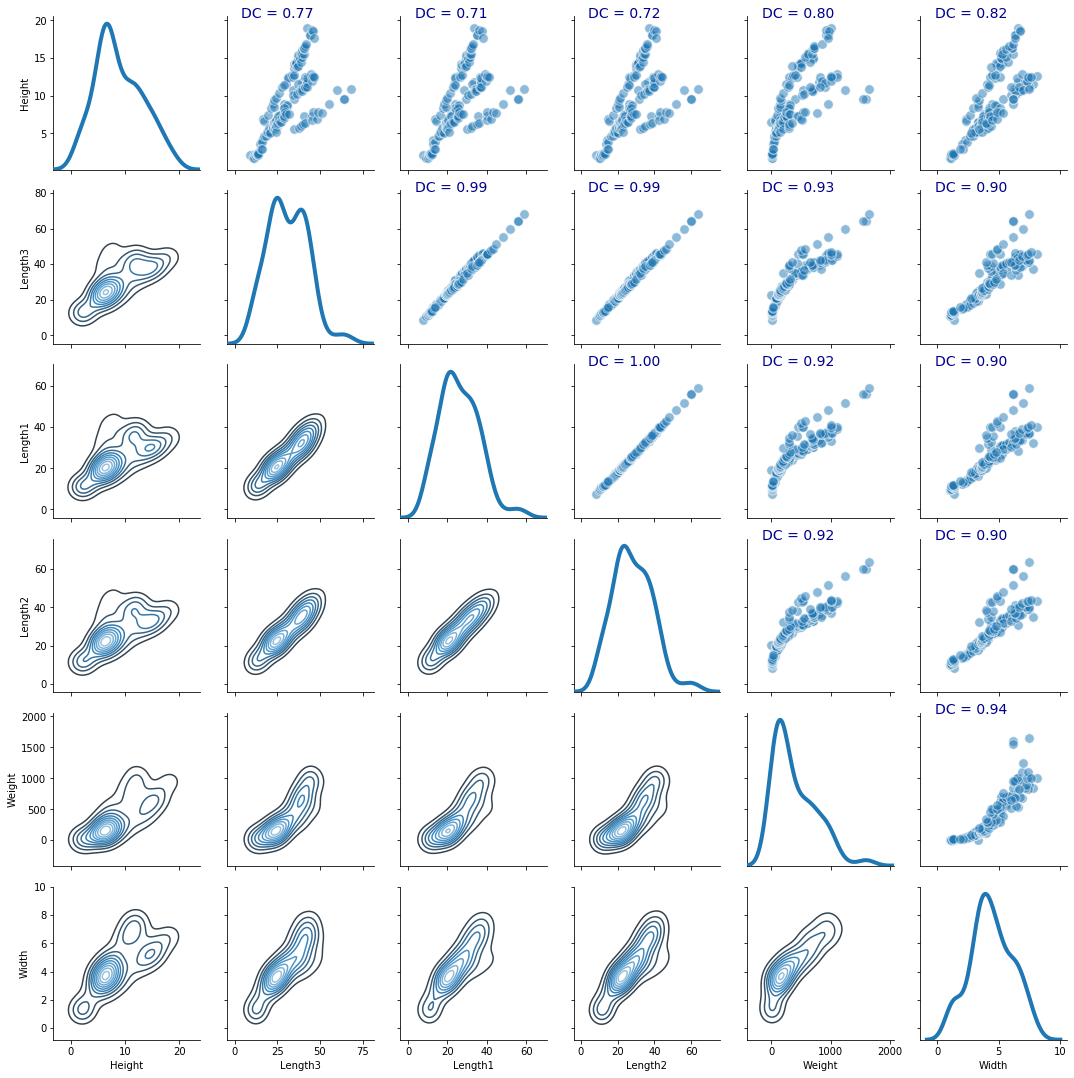

In [13]:
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

In [14]:
import pymc3 as pm
with pm.Model() as glm_model:
    pm.glm.GLM.from_formula('Weight ~ Height + Width + Length1 + Length2 + Length3',
                            data,
                            family=pm.glm.families.Normal())
    trace2 = pm.sample(1000, tune=1000, init='adapt_diag')#, njobs=1)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, Length3, Length2, Length1, Width, Height, Intercept]
Sampling 2 chains: 100%|██████████| 4000/4000 [05:00<00:00, 13.32draws/s]
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The acceptance probability does not match the target. It is 0.8798357508367588, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26915c50>,
      dtype=object)

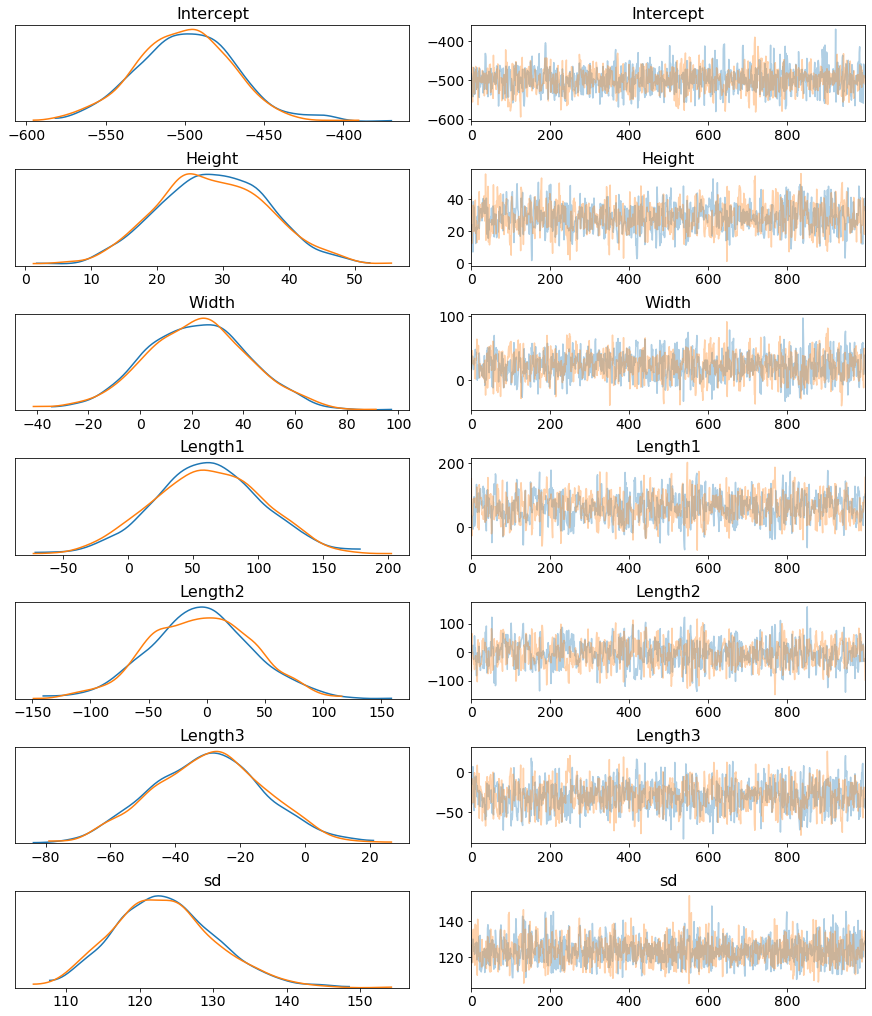

In [15]:
pm.traceplot(trace2)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c263b3b38>,
      dtype=object)

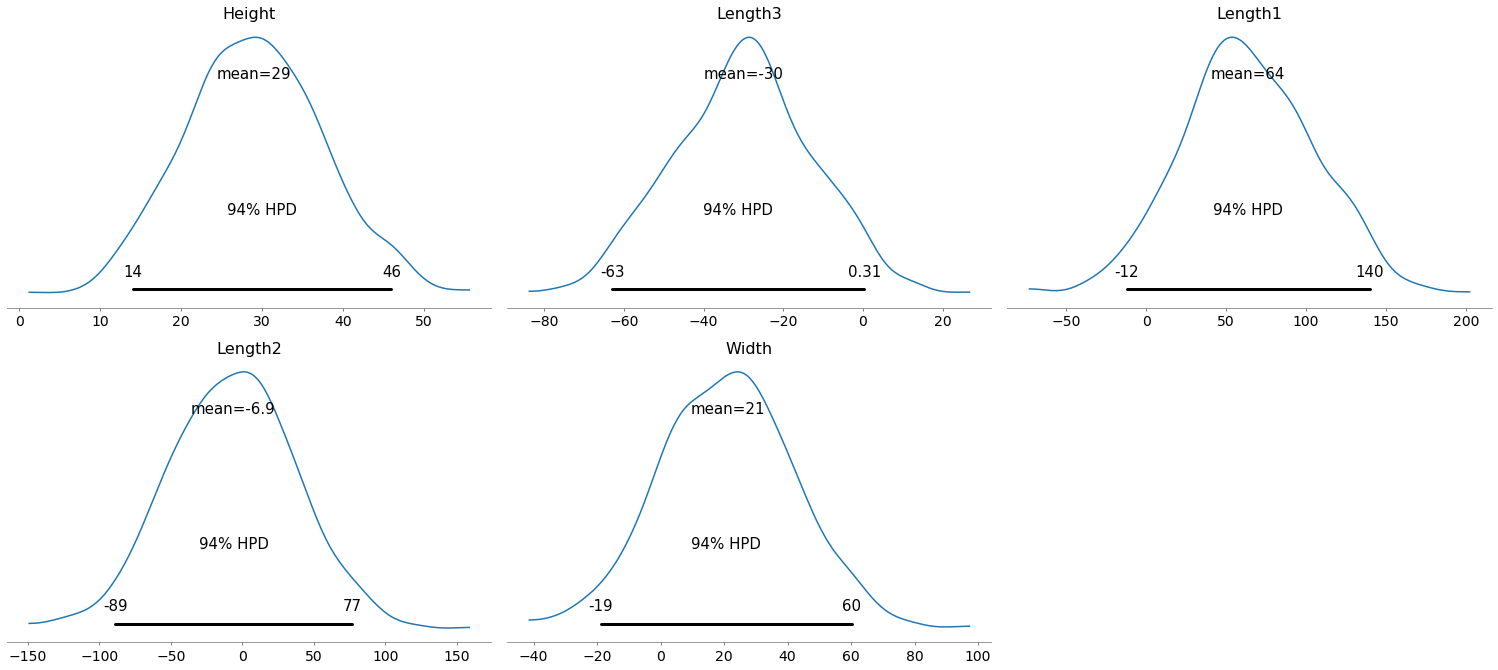

In [16]:
pm.plot_posterior(trace2[500:], varnames=['Height', 'Length3', 'Length1', 'Length2', 'Width'])


In [53]:
import numpy as np
import scipy.stats as st

def confInt(r, nwells):
    z_crit = st.norm.ppf(.975)
    std_Z = 1/np.sqrt(nwells-3)      
    E = z_crit*std_Z
    Z_star = 0.5*(np.log((1+r)/(1.0000000000001-r)))
    ZCI_l = Z_star - E
    ZCI_u = Z_star + E
    RCI_l = (np.exp(2*ZCI_l)-1)/(np.exp(2*ZCI_l)+1) 
    RCI_u = (np.exp(2*ZCI_u)-1)/(np.exp(2*ZCI_u)+1)
    return RCI_u, RCI_l

In [55]:
from sklearn.ensemble import RandomForestRegressor #ML Algorithm (simplest one)
from sklearn import metrics
from sklearn.model_selection import train_test_split

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [56]:
data.head()

,Height,Length3,Length1,Length2,Weight,Width
0,11.52,30.00,23.20,25.40,242.00,4.02
1,12.48,31.20,24.00,26.30,290.00,4.31
2,12.38,31.10,23.90,26.50,340.00,4.70
3,12.73,33.50,26.30,29.00,363.00,4.46
4,12.44,34.00,26.50,29.00,430.00,5.13


In [57]:
data.columns

Index(['Height', 'Length3', 'Length1', 'Length2', 'Weight', 'Width'], dtype='object')

In [65]:
data_weight = data[['Weight']]

In [70]:
data_weight = np.asarray(data_weight)

In [119]:
y = data_weight
y = np.asarray(data_weight)
y = np.reshape(y,159)
y

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [136]:
data_Length1 = data[['Length1']]
x = np.asarray(data_Length1)
x = np.reshape(x,159)
x

array([23.2, 24. , 23.9, 26.3, 26.5, 26.8, 26.8, 27.6, 27.6, 28.5, 28.4,
       28.7, 29.1, 29.5, 29.4, 29.4, 30.4, 30.4, 30.9, 31. , 31.3, 31.4,
       31.5, 31.8, 31.9, 31.8, 32. , 32.7, 32.8, 33.5, 35. , 35. , 36.2,
       37.4, 38. , 12.9, 16.5, 17.5, 18.2, 18.6, 19. , 19.1, 19.4, 20.4,
       20.5, 20.5, 21. , 21.1, 22. , 22. , 22.1, 23.6, 24. , 25. , 29.5,
       23.6, 24.1, 25.6, 28.5, 33.7, 37.3, 13.5, 14.3, 16.3, 17.5, 18.4,
       19. , 19. , 19.8, 21.2, 23. , 24. ,  7.5, 12.5, 13.8, 15. , 15.7,
       16.2, 16.8, 17.2, 17.8, 18.2, 19. , 19. , 19. , 19.3, 20. , 20. ,
       20. , 20. , 20. , 20.5, 20.5, 20.7, 21. , 21.5, 22. , 22. , 22.6,
       23. , 23.5, 25. , 25.2, 25.4, 25.4, 25.4, 25.9, 26.9, 27.8, 30.5,
       32. , 32.5, 34. , 34. , 34.5, 34.6, 36.5, 36.5, 36.6, 36.9, 37. ,
       37. , 37.1, 39. , 39.8, 40.1, 40.2, 41.1, 30. , 31.7, 32.7, 34.8,
       35.5, 36. , 40. , 40. , 40.1, 42. , 43.2, 44.8, 48.3, 52. , 56. ,
       56. , 59. ,  9.3, 10. , 10.1, 10.4, 10.7, 10

In [137]:
N = len(y)
N

159

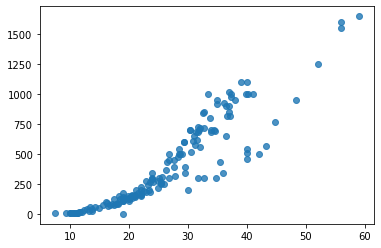

In [138]:
sns.regplot(x, y, fit_reg=False)

In [122]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

In [123]:
X = x.reshape(-1, 1)
X.shape

(159, 1)

In [139]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [140]:
gp.kernel_

316**2 + Matern(length_scale=1e-05, nu=1.5) + WhiteKernel(noise_level=1e+05)

In [141]:
x_pred = np.linspace(0, 20).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

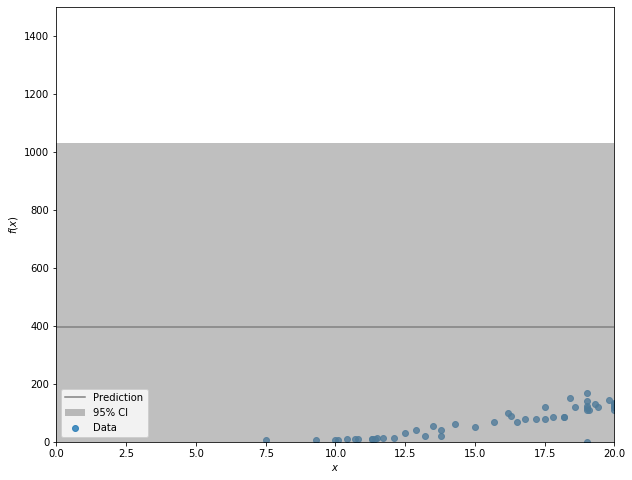

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.regplot(x, y, fit_reg=False, label='Data')
plt.plot(x_pred, y_pred, color='grey', label='Prediction')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(0,20)
plt.ylim(0, 1500)
plt.legend(loc='lower left');